<a href="https://colab.research.google.com/github/AshuraSaint/Laboratornya/blob/main/regression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основы машинного обучения: лабораторная работа №2
## <!--Задание 1. -->Регрессионный анализ

В этом задании необходимо реализовать обучающиеся модели в контексте решения задачи регрессии на одном из представленных по варианту задания наборе данных.

### Цель

Получение навыков решения задачи регрессионного анализа и оптимизации функций методом градиентного спуска

### Оценивание и баллы

За это задание в общей сложности можно получить до 10 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить все приведенные ниже задачи.


***
#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [2]:
### BEGIN YOUR CODE

Student_ID = 3

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [4]:
datasets = [('Diabetes dataset','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'), ('California Housing','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#fetch-california-housing'), ('Auto MPG', 'https://archive.ics.uci.edu/dataset/9/auto+mpg'), ('Forest Fires', 'https://archive.ics.uci.edu/dataset/162/forest+fires'), ('Concrete Compressive Strength', 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength')]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Информация о датасете '{datasets[dataset_id][0]}' доступна по следующей ссылке: {datasets[dataset_id][1]}")

Информация о датасете 'Forest Fires' доступна по следующей ссылке: https://archive.ics.uci.edu/dataset/162/forest+fires


#### 2. Подготовить среду разработки и данные
Добавьте импорт всех необходимых библиотек в ячейке ниже. Постарайтесь не импортировать библиотеки в других ячейках, чтобы избежать ошибок в коде

In [5]:
### BEGIN YOUR CODE

import pandas as pd
import os
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
### END YOUR CODE

При необходимости скачайте датасет с помощью команды `!wget ...` и разархивируйте его. Загрузите датасет в переменную `dataset`, с которой будете дальше работать

In [6]:
### BEGIN YOUR CODE

#!wget https://archive.ics.uci.edu/dataset/162/forest+fires

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
filename = "forestfires.csv"

# Скачивание файла
if not os.path.exists(filename):
    !wget {url} -O {filename}

# Загрузка датасета в Pandas DataFrame
dataset = pd.read_csv(filename)

### END YOUR CODE

--2024-11-26 08:22:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘forestfires.csv’

forestfires.csv         [ <=>                ]  24.88K  --.-KB/s    in 0.02s   

2024-11-26 08:22:29 (1.44 MB/s) - ‘forestfires.csv’ saved [25478]



####  3. Посмотреть на общую картину (1 балл)
Ознакомьтесь с информацией о датасете по ссылке из задания и **напишите один абзац текста с описанием решаемой задачи**. В частности, ответьте в своем тексте на следующие вопросы:

 * Каков размер датасета? (в Мб)
 * Сколько в нем записей (объектов)?
 * Сколько признаков (фич) у объектов в датасете?
 * Есть ли категориальные данные? Какие?
 * Есть ли пропущенные значения?
 * Есть ли в датасете столбец с ответами (target)? Какой у него тип данных?
 * Какую задачу может решать регрессионная модель, построенная на этом датасете? Какую величину она будет предсказывать?
 * Приведите основные статистические данные о датасете, которые можно получить вызовом одной-двух функций в pandas. Какие выводы о датасете можно сделать?

В ячейке ниже напишите код, который выводит всю необходимую информацию, а в ячейке под ней (ее тип - Markdown, т.е. текст) опишите своими словами решаемую задачу и используемый набор данных.

In [7]:
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [8]:
dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Датасет Forest Fires из UCI Machine Learning Repository имеет размер 52.6 КБ (0.0526 МБ) и содержит 517 записей с 13 признаками. Среди них два категориальных признака: month (месяц) и day (день недели). Пропущенные значения отсутствуют. Целевая переменная (столбец area) представляет площадь лесных пожаров в гектарах и имеет тип данных float64. Основная задача, которую может решать регрессионная модель, — предсказание площади выгорания на основе метеорологических и экологических факторов, таких как температура, влажность, скорость ветра и индексы из системы Fire Weather Index (FWI). Статистический анализ показывает, что данные асимметричны: медианная площадь выгорания равна 0.52, но максимум достигает 1090.84, что требует учета выбросов в модели.

---
#### 4. Анализ данных, очистка, и масштабирование (2 балла)

**Анализ данных:** проверьте наличие корреляции между признаками. Некоторые из них могут оказаться более коррелированными с объясняемой переменной (target), чем остальные. Эта информация в дальнейшем поможет провалидировать найденные коэффициенты регрессионной модели.

**Очистка данных:** если датасет содержит пропущенные значения, заполните их с помощью модуля [`sklearn.impute`](https://scikit-learn.org/stable/modules/impute.html). Если в датасете есть категориальные признаки, [преобразуйте их в числовые](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features) с помощью `OneHotEncoder`.

**Масштабирование признаков.** Напишите код, осуществляющий нормализацию значений всех признаков [следующим образом](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling):

- вычесть среднее значение соответствующего признака из всех значений этого признака;
- отмасштабировать (поделить) значения признаков на СКО этих признаков.

**Особенности реализации:** напишите код, который реализует последовательность (пайплайн) обработки обучающих данных, а затем примените его к валидационной и тестовой выборкам в случае их наличия.

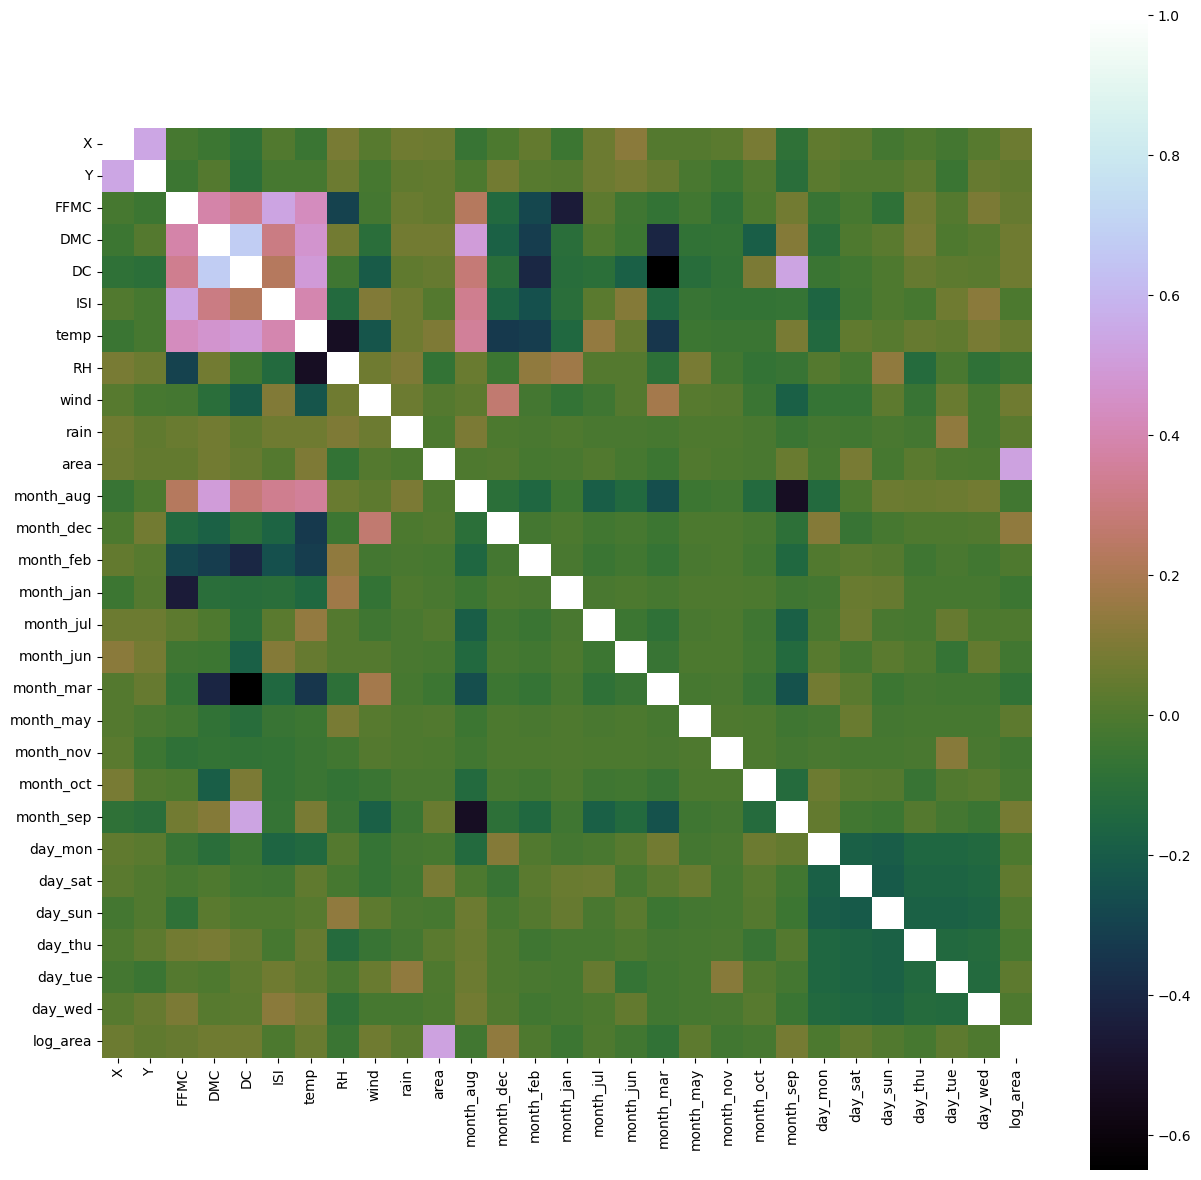

In [10]:
### BEGIN YOUR CODE

# Преобразование категориальных признаков в числовые с помощью OneHotEncoder
dataset_encoded = pd.get_dummies(dataset, columns=['month', 'day'], drop_first=True)
# Вычисление корреляции


# Логарифмическое преобразование целевой переменной
dataset_encoded['log_area'] = np.log1p(dataset_encoded['area'])

corr_matrix = dataset_encoded.corr()
plt.figure(figsize=(15, 15))
# Построение тепловой карты корреляционной матрицы
sns.heatmap(corr_matrix, vmax=1, square=True, cmap='cubehelix')
plt.show()


# рекомендуется разбить выборку на обучающую и тестовую, например, с помощью StratifiedShuffleSplit из sklearn.model_selection

# при необходимости добавьте дополнительные ячейки с кодом, чтобы разбить код на смысловые блоки и повысить его читабельность

### END YOUR CODE

In [24]:
# Разделение датасета на обучающую, валидационную и тестовую выборку
X = dataset_encoded.drop(['area', 'log_area'], axis=1)  # Убираем целевые переменные
y = dataset_encoded['log_area']  # Используем логарифмированную целевую переменную

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Определяем числовые и категориальные признаки
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['bool', 'object']).columns

# Пайплайн для обработки числовых признаков
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Заполнение пропущенных значений средними
    ('scaler', StandardScaler())  # Масштабирование
])

# Пайплайн для обработки категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncoding категориальных данных
])

# Объединяем обработку числовых и категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),           # Обработка числовых признаков
        ('cat', categorical_transformer, categorical_features)    # Обработка категориальных признаков
    ])

# Применяем пайплайн на обучающие данные и трансформируем остальные
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

# Получаем имена числовых признаков
numeric_feature_names = numeric_features.tolist()

# Получаем имена категориальных признаков после One-Hot Encoding
categorical_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features).tolist()

# Объединяем имена всех признаков
all_feature_names = numeric_feature_names + categorical_feature_names

# Преобразуем X_train_processed, X_val_processed, X_test_processed обратно в DataFrame
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_feature_names, index=X_train.index)
X_val_processed_df = pd.DataFrame(X_val_processed, columns=all_feature_names, index=X_val.index)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_feature_names, index=X_test.index)

# Выводим размеры и пример результата для проверки
print(f"Размеры X_train_processed_df: {X_train_processed_df.shape}")
print(f"Размеры X_val_processed_df: {X_val_processed_df.shape}")
print(f"Размеры X_test_processed_df: {X_test_processed_df.shape}")

print("Пример X_train_processed_df:")
print(X_train_processed_df.head())

# Теперь можно использовать X_train_processed_df, X_val_processed_df и X_test_processed_df
# для обучения моделей или дальнейшего анализа.


Размеры X_train_processed_df: (413, 44)
Размеры X_val_processed_df: (52, 44)
Размеры X_test_processed_df: (52, 44)
Пример X_train_processed_df:
            X         Y      FFMC       DMC        DC       ISI      temp  \
329 -0.288472 -1.094859  0.280286 -0.150282  0.810272 -0.095838  0.797602   
173 -0.288472 -0.266696  0.061652  0.217866  0.549136 -0.455434 -0.205272   
272 -1.161285  0.561466  0.263468  0.614919  0.435442  1.419602  0.227001   
497 -0.724878 -0.266696  0.936186  1.048482  0.487669  1.419602  2.319206   
182  0.147934 -0.266696 -0.627884 -1.469227 -2.014816 -1.251682 -1.121692   

           RH      wind      rain  ...  day_sat_False  day_sat_True  \
329 -1.059419  0.001631 -0.067817  ...            0.0           1.0   
173 -0.335215 -1.008923 -0.067817  ...            1.0           0.0   
272  0.147588  0.001631 -0.067817  ...            1.0           0.0   
497 -1.059419 -1.008923 -0.067817  ...            1.0           0.0   
182  0.509690 -1.008923 -0.067817  ...

- - -
#### 5. Реализовать градиентный спуск (3 балла)
Используйте описание метода градиентного спуска, которое было приведено на лекции. Не забудьте добавить в матрицу признаков обучающей выборки столбец $\textbf{x}_0$, заполненный единицами. Напишите код, реализующий класс **LinearRegressionModel** и объявленные в нем методы.
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **LinearRegressionModel** class and its predefined methods.

**Градиентный спуск:** ЗАПРЕЩАЕТСЯ вызывать какие-либо библиотечные функции и использовать иной готовый код для построения модели линейной регрессии и поиска ее параметров. Можно использовать только базовые математические операции из пакета numpy, например, скалярное произведение и матричное умножение. Проследите, чтобы код для обучения модели был полностью векторизован.

In [42]:


class LinearRegressionModel:
    """
    Класс для выполнения линейной регрессии с объяснением на каждом шаге.
    """

    def __init__(self):
        """
        Инициализация модели: параметры, скорость обучения, значение функции стоимости.
        """
        self.theta = None  # Вектор параметров модели (инициализируется позже)
        self.alpha = 0.001  # Скорость обучения (learning rate) для градиентного спуска
        self.cost = None   # Финальное значение функции стоимости

    def compute_cost(self, X, y, theta):
        """
        Вычисление функции стоимости (среднеквадратичная ошибка).
        """
        m = len(y)  # Количество наблюдений
        predictions = X.dot(theta)  # Предсказания модели: X * theta
        errors = predictions - y    # Разница между предсказаниями и реальными значениями
        cost = (1 / (2 * m)) * np.sum(errors**2)  # Сумма квадратов ошибок, деленная на 2m
        return cost

    def gradient_descent(self, X, y, theta, alpha, iters):
        """
        Обновление параметров модели методом градиентного спуска.
        """
        m = len(y)  # Количество наблюдений
        cost_history = []  # Для отслеживания изменения функции стоимости

        for _ in range(iters):
            # 1. Вычисляем предсказания
            predictions = X.dot(theta)

            # 2. Находим ошибки
            errors = predictions - y

            # 3. Вычисляем градиент
            gradient = (1 / m) * X.T.dot(errors)

            # 4. Обновляем параметры (шагаем в направлении уменьшения ошибки)
            theta -= alpha * gradient

            # 5. Сохраняем текущее значение функции стоимости
            cost_history.append(self.compute_cost(X, y, theta))

        return theta, cost_history

    def fit_with_GD(self, X_train, y_train, iters=200):
        """
        Обучение модели методом градиентного спуска.
        """
        # Добавляем столбец единиц в X_train для учета свободного члена (theta_0)
        X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

        # Преобразуем y_train, если он является объектом pandas
        y_train = y_train.values if hasattr(y_train, 'values') else y_train

        # Инициализация параметров (все веса равны нулю)
        self.theta = np.zeros(X_b.shape[1])

        # Вызываем градиентный спуск
        self.theta, cost_history = self.gradient_descent(X_b, y_train, self.theta, self.alpha, iters)

        # Сохраняем финальное значение функции стоимости
        self.cost = cost_history[-1]
        return self.cost

    def invert_matrix(self, matrix):
        """
        Ручное обращение матрицы с использованием метода Гаусса-Жордана.
        """
        n = matrix.shape[0]  # Размерность матрицы
        augmented_matrix = np.hstack((matrix, np.eye(n)))  # Создаем расширенную матрицу [A | I]

        for i in range(n):
            # Если элемент на диагонали равен 0, ищем строку для обмена
            if augmented_matrix[i, i] == 0:
                for j in range(i + 1, n):
                    if augmented_matrix[j, i] != 0:
                        augmented_matrix[[i, j]] = augmented_matrix[[j, i]]  # Меняем строки местами
                        break
                else:
                    raise ValueError("Матрица вырождена и не может быть обращена")

            # Нормализуем текущую строку
            augmented_matrix[i] /= augmented_matrix[i, i]

            # Обнуляем элементы ниже и выше текущего
            for j in range(n):
                if i != j:
                    augmented_matrix[j] -= augmented_matrix[j, i] * augmented_matrix[i]

        # Возвращаем правую часть расширенной матрицы, которая теперь является обратной
        return augmented_matrix[:, n:]

    def fit_with_normal_equations(self, X_train, y_train):
        """
        Обучение модели методом нормальных уравнений (МНК).
        """
        # Добавляем столбец единиц в X_train
        X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

        # Преобразуем y_train, если он является объектом pandas
        y_train = y_train.values if hasattr(y_train, 'values') else y_train

        # Вычисляем параметры с использованием формулы нормальных уравнений
        self.theta = self.invert_matrix(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

        # Вычисляем финальное значение функции стоимости
        self.cost = self.compute_cost(X_b, y_train, self.theta)
        return self.cost

    def predict(self, X_test):
        """
        Предсказание значений на основе обученной модели.
        """
        # Добавляем столбец единиц в X_test
        X_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

        # Вычисляем предсказания
        return X_b.dot(self.theta)

    def __str__(self):
        """
        Вывод параметров модели и функции стоимости.
        """
        return f"Вектор параметров: {self.theta}\nЗначение функции стоимости: {self.cost}"


# Обучение модели методом градиентного спуска
my_model = LinearRegressionModel()
cost_gd = my_model.fit_with_GD(X_train_processed_df, y_train, iters=500)
print(my_model)

# Предсказание на тестовой выборке
y_pred = my_model.predict(X_test_processed_df)
print(f"Предсказанные значения: {y_pred[:5]}")  # Печать первых 5 предсказаний


Вектор параметров: [ 0.07347241  0.04129434  0.0252122   0.02568877  0.04216014  0.0218077
 -0.01372913  0.01057426 -0.0128866   0.02114409  0.01572972  0.06450752
  0.00896489  0.0611594   0.01231301  0.06804862  0.00542379  0.07422973
 -0.00075732  0.06697664  0.00649577  0.07408082 -0.00060841  0.07520942
 -0.00173701  0.07009522  0.00337719  0.07448562 -0.00101321  0.07441225
 -0.00093984  0.02854569  0.04492672  0.05771723  0.01575518  0.05150268
  0.02196973  0.07005463  0.00341778  0.07071531  0.0027571   0.05619259
  0.01727982  0.06658501  0.0068874 ]
Значение функции стоимости: 0.9269520087589885
Предсказанные значения: [1.08323273 1.20004293 1.11196852 0.96173607 1.14773108]


* **Скорость обучения:** попробуйте использовать разные скорости обучения и подберите такое значение, которое обеспечивает быструю сходимость. При выборе скорости обучения нужно следить за графиком функции качества (стоимости), построенном относительно количества итераций работы алгоритма градиентного спуска. Значение функционала качества $Q(\theta)$ должно быстро убывать и стремиться к небольшому значению. Такое поведение также является свидетельством того, что алгоритм работает корректно. Если скорость обучения слишком большая, значение функционала качества $Q(\theta)$ может начать колебаться и расти. По графику, который должен строить код в ячейке ниже, необходимо выбрать наиболее подходящую скорость обучения из числа проанализированных, и обосновать свой выбор. Без этого объяснения баллы за данную задачу начислены не будут.

Text(0.5, 1.0, 'Зависимость суммарной ошибки на обучающей выборке от количества итераций')

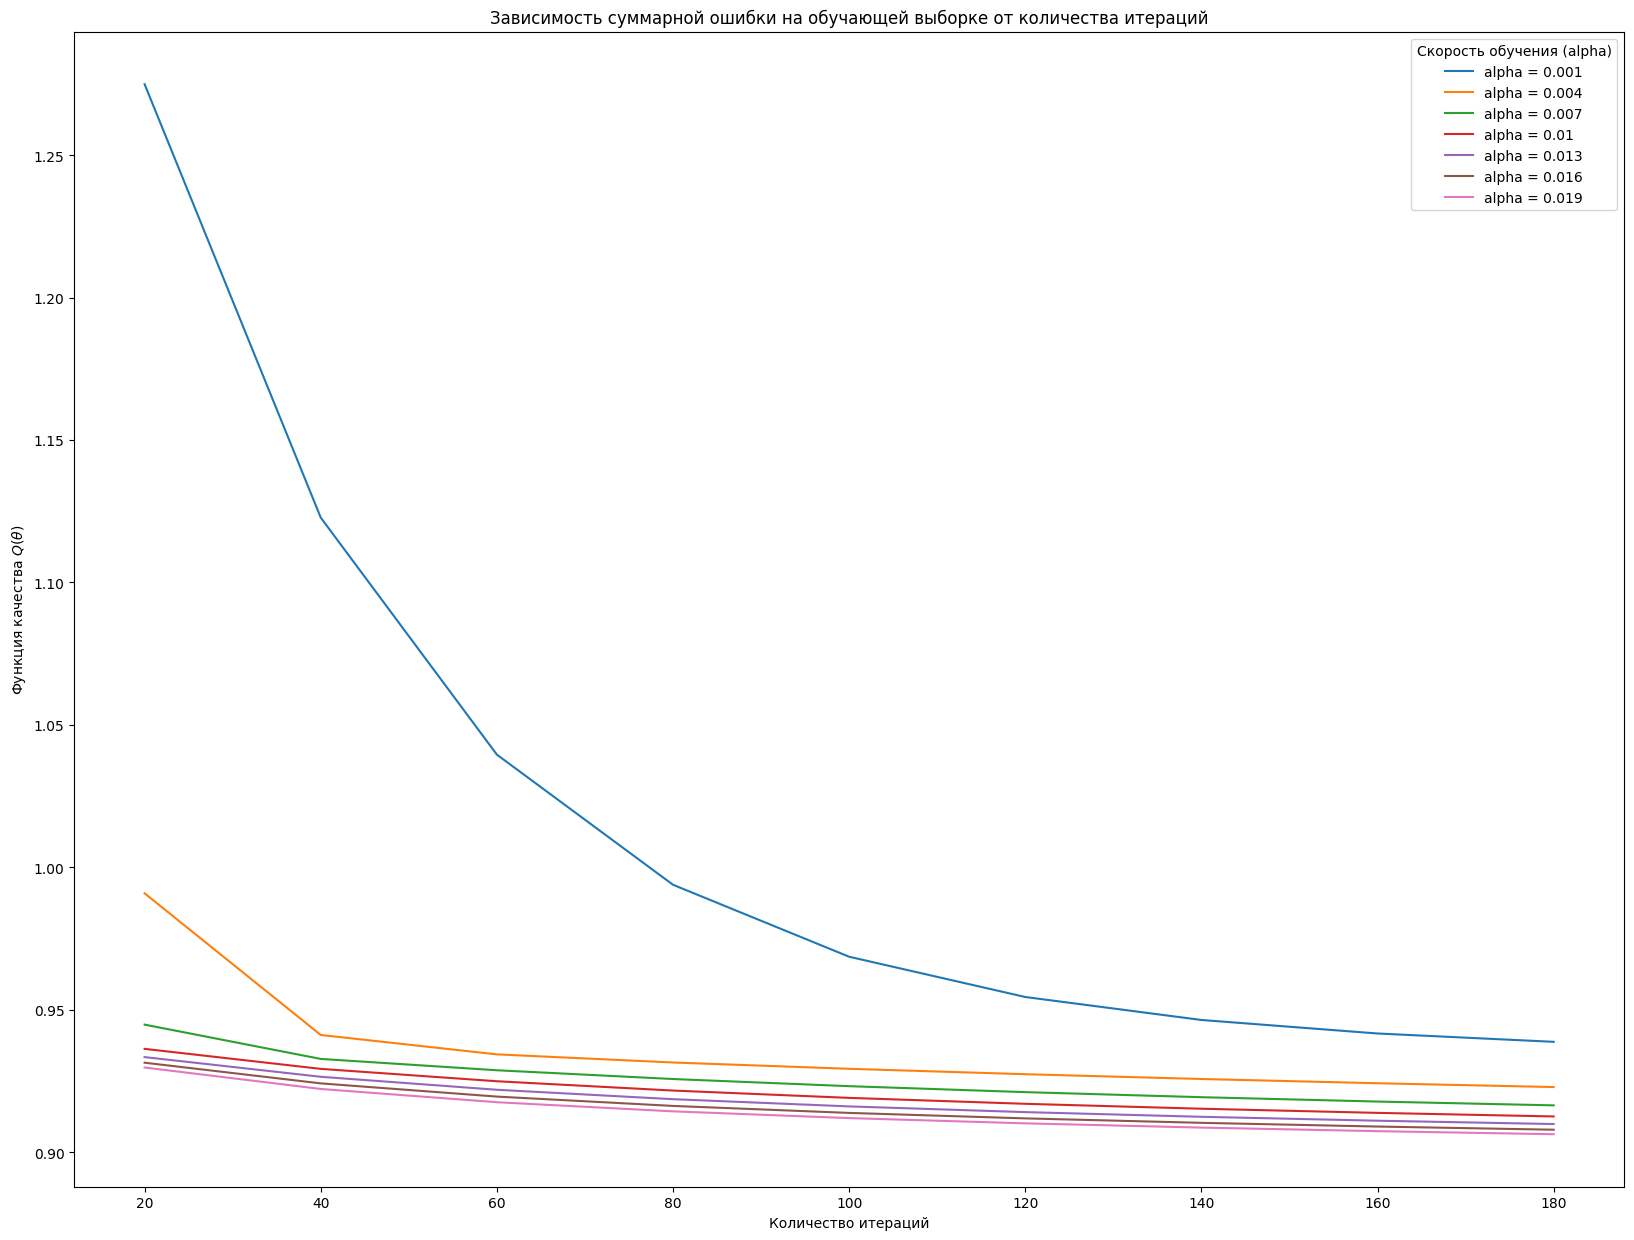

In [43]:
# Используйте следующий код, чтобы построить график скорости обучения.
# Для построения графика функции качества необходимо заполнить списки iters и costs
# Можно построить несколько кривых на одном графике, соответствующих разным скоростям обучения, чтобы выбрать наилучшую
#
plt.figure(figsize=(20, 15))
iters = list(range(20, 200, 20)) # Пример: итерации от 20 до 200 с шагом 20

for i in range(1, 20, 3): # Пример значений скорости обучения от 0.1 до 1.0 с шагом 0.3
    my_model.alpha = i / 1000
    costs = []
    for j in iters:
        cost = my_model.fit_with_GD(X_train_processed_df, y_train, iters=j)
        costs.append(cost)
    plt.plot(iters, costs, label=f'alpha = {my_model.alpha}')

plt.legend(title='Скорость обучения (alpha)', fontsize=10)
plt.xlabel('Количество итераций')
plt.ylabel(r'Функция качества $Q(\theta)$')
plt.title('Зависимость суммарной ошибки на обучающей выборке от количества итераций')


- - -
#### 5. Решить систему нормальных уравнений (метод наименьших квадратов) (1 балл)

Как было показано на лекциях, решить задачу построения модели линейной регрессии можно в явном виде с помощью системы нормальных уравнений. Использование формулы для решения системы нормальных уравнений матричным способом не требует номирования признаков, подбора гиперпараметров и может быть легко реализовано в коде:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Обратите внимание, что здесь так же нужно добавить столбец из единиц в матрицу $\mathbf{X}$, чтобы найти свободный член (смещение).

In [28]:
# Реализуйте метод fit_with_normal_equations класса LinearRegressionModel перед тем,
# как выполнить приведенный ниже код

my_normal_equations_model = LinearRegressionModel()
cost = my_normal_equations_model.fit_with_normal_equations(X_train, y_train)

print(cost)

0.8659940205582963


- - -
#### 6. Сравнить разные методы (2 балла)

Оцените и сравните решения задачи построения уравнения линейной регрессии методом градиентного спуска и методом решения системы нормальных уравнений (методом наименьших квадратов). В теории они должны быть одинаковыми или хотя бы схожими. Для более полной оценки следует воспользоваться встроенной в библиотеку `sklearn` реализацией [алгоритма **Stochastic Gradient Descent (SGD)**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) в качестве третьего метода для сравнения. Для каждого метода (и полученной с его помощью модели) необходимо вычислить RMSE на **тестовой выборке** как меру производительности. Вы можете использовать готовые функции из библиотеки для вычисления, как показано ниже, вместо того чтобы писать собственный код:

- Какой из методов является наиболее производительным на заданном по варианту датасете?
- Как вы оцениваете ошибку каждой из построенных моделей? Приемлемо? Средне? Плохо?


In [30]:
from sklearn.metrics import mean_squared_error

# Использование встроенной реализации метода стохастического градиентного спуска для построения модели
from sklearn.linear_model import SGDRegressor
# Вычисляем RMSE для метода градиентного спуска (в логарифмической шкале и в оригинальной)
y_pred_gd = my_model.predict(X_test_processed_df)
rmse_gd_log = np.sqrt(mean_squared_error(y_test, y_pred_gd))
y_pred_gd_original_scale = np.expm1(y_pred_gd)
y_test_original_scale = np.expm1(y_test)
rmse_gd_original = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_gd_original_scale))

print(f"RMSE для градиентного спуска (логарифмическая шкала): {rmse_gd_log}")
print(f"RMSE для градиентного спуска (оригинальная шкала): {rmse_gd_original}")

# Вычисляем RMSE для метода нормальных уравнений (в логарифмической шкале и в оригинальной)
y_pred_ne = my_model.predict(X_test_processed_df)
rmse_ne_log = np.sqrt(mean_squared_error(y_test, y_pred_ne))
y_pred_ne_original_scale = np.expm1(y_pred_ne)
rmse_ne_original = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_ne_original_scale))

print(f"RMSE для нормальных уравнений (логарифмическая шкала): {rmse_ne_log}")
print(f"RMSE для нормальных уравнений (оригинальная шкала): {rmse_ne_original}")

# Вычисляем RMSE для стохастического градиентного спуска (в логарифмической шкале и в оригинальной)
# Создание и обучение модели стохастического градиентного спуска
my_sgd_model = SGDRegressor(random_state=42, max_iter=1000, tol=1e-3)
my_sgd_model.fit(X_train_processed_df, y_train)
# Вычисляем RMSE для стохастического градиентного спуска (в логарифмической шкале и в оригинальной)
y_pred_sgd = my_sgd_model.predict(X_test_processed_df)
rmse_sgd_log = np.sqrt(mean_squared_error(y_test, y_pred_sgd))

# Преобразуем предсказания и целевые значения в исходный масштаб (экспоненциальное преобразование)
y_pred_sgd_original_scale = np.expm1(y_pred_sgd)
y_test_original_scale = np.expm1(y_test)
rmse_sgd_original = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_sgd_original_scale))

print(f"RMSE для стохастического градиентного спуска (логарифмическая шкала): {rmse_sgd_log}")
print(f"RMSE для стохастического градиентного спуска (оригинальная шкала): {rmse_sgd_original}")



RMSE для градиентного спуска (логарифмическая шкала): 1.226473378437148
RMSE для градиентного спуска (оригинальная шкала): 13.469797465309638
RMSE для нормальных уравнений (логарифмическая шкала): 1.226473378437148
RMSE для нормальных уравнений (оригинальная шкала): 13.469797465309638
RMSE для стохастического градиентного спуска (логарифмическая шкала): 1.2452492309338905
RMSE для стохастического градиентного спуска (оригинальная шкала): 13.76154038992844


\

- - -
#### 7. Опшите полученные результаты (1 балл)

Мы можем эффективно представить наше решение, визуализировав результаты работы трёх различных моделей (градиентного спуска, нормальных уравнений и стохастического градиентного спуска) с помощью метрики RMSE, чтобы показать их точность. На данный момент мы выяснили, что наши модели способны делать предсказания с приемлемой точностью, но точность ограничена из-за наличия сложных или нелинейных зависимостей в данных. Использование логарефмического преобразования целевой переменной площади помогло улучшить показатели.

- - -
### Нужна помощь?

Если у вас возникли трудности при выполнении задания, попробуйте следующие решения:

- Посмотрите слайды к презентации по регрессионному анализу и методам наименьших квадратов, градиентного спуска и стохастического градиентного спуска. Слайды можно найти в личном кабинете или в ТГ-канале курса.
- Задайте вопрос преподавателю в ТГ-канале курса.
- Задайте вопрос преподавателю лично в университете.